In [168]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
import numpy
import warnings

In [6]:
iris = fetch_ucirepo(id=53) 

In [82]:
vino = fetch_ucirepo(id=186) 

In [5]:
abalone = fetch_ucirepo(id=1) 

In [105]:
abalone.data.features = abalone.data.features.replace('M', 0)
abalone.data.features = abalone.data.features.replace('F', 1)
abalone.data.features = abalone.data.features.replace('I', 2)

/tmp/ipykernel_48027/1266789200.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  abalone.data.features = abalone.data.features.replace('I', 2)


In [146]:
def kFold(datos, algoritmo,k=10,stratified=True):
    # Recibe los datos de fetch_ucirepo, y el algoritmod entrenamiento que se va ocupar
    # Retorna un listado de valores reales, y los predicciones realizados por el algoritmo
    if k<1:
        skf = StratifiedShuffleSplit(n_splits=1, test_size=(1-k), random_state=0)
    elif stratified:
        skf = StratifiedKFold(n_splits=k)
    else:
        skf = KFold(n_splits=k)
    x = datos.data.features.to_numpy()
    y = datos.data.targets.to_numpy()
    real = numpy.array([])
    pred = numpy.array([])
    for indEnt,indPrueba in skf.split(x,y): # Indice de entrenamiento e indice de prueba
        xEnt = x[indEnt]
        yEnt = y[indEnt]
        xPrueba = x[indPrueba]
        yPrueba = y[indPrueba]
        algoritmo.fit(xEnt,numpy.ravel(yEnt))
        real = numpy.concatenate([real, numpy.ravel(yPrueba)])
        pred = numpy.concatenate([pred, algoritmo.predict(xPrueba)])
    return [real,pred,algoritmo.classes_]

In [122]:
def oneOut(datos, algoritmo):
    return kFold(datos,algoritmo,datos.data.features.to_numpy().shape[0],False)

In [128]:
def holdOut(datos, algoritmo, k=0.7):
    return kFold(datos,algoritmo,k,False)

In [176]:
def crearMatriz(datos,algoritmo,metodo):
    with warnings.catch_warnings(action="ignore"): # Esto se hace porque aveces se levanta un warning de insuficiencia de datos para la clase
        res = metodo(datos,algoritmo)
    cm = confusion_matrix(res[0],res[1])
    acc = cm.diagonal()/cm.sum(axis=1) # https://stackoverflow.com/questions/39770376/scikit-learn-get-accuracy-scores-for-each-class
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=res[2])
    print(f"Accuracy global: {sum(acc)/len(acc)}")
    print("Clase: Accuracy")
    [print(f"{b}: {a}") for a,b in zip(acc, res[2])]
    disp.plot()
    plt.show()

In [171]:
alg = GaussianNB()

## Iris

Accuracy global: 0.9777777777777779
Clase: Accuracy
Iris-setosa: 1.0
Iris-versicolor: 1.0
Iris-virginica: 0.9333333333333333


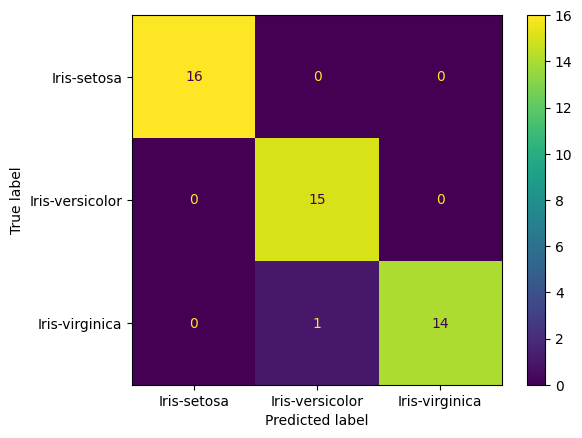

In [177]:
crearMatriz(iris,alg,holdOut)

Accuracy global: 0.9533333333333333
Clase: Accuracy
Iris-setosa: 1.0
Iris-versicolor: 0.94
Iris-virginica: 0.92


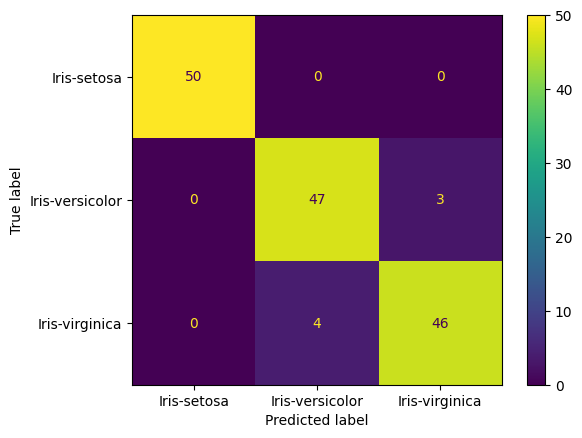

In [178]:
crearMatriz(iris,alg,kFold)

Accuracy global: 0.9533333333333333
Clase: Accuracy
Iris-setosa: 1.0
Iris-versicolor: 0.94
Iris-virginica: 0.92


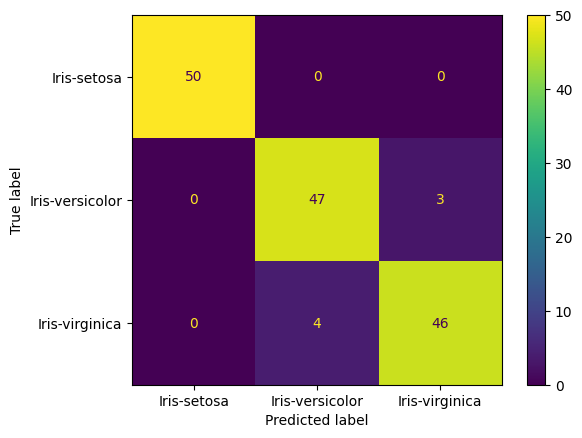

In [179]:
crearMatriz(iris,alg,oneOut)

## vino

Accuracy global: 0.2416340594113857
Clase: Accuracy
3: 0.1111111111111111
4: 0.09230769230769231
5: 0.5186915887850467
6: 0.42303172737955347
7: 0.5462962962962963
8: 0.0
9: 0.0


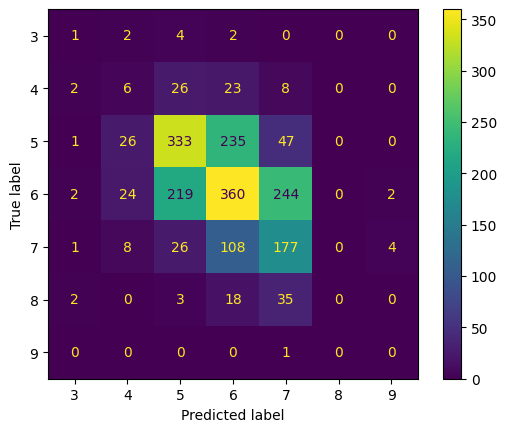

In [180]:
crearMatriz(vino,alg,holdOut)

Accuracy global: 0.25818887312693345
Clase: Accuracy
3: 0.23333333333333334
4: 0.14351851851851852
5: 0.48362956033676335
6: 0.4058533145275035
7: 0.4995366079703429
8: 0.04145077720207254
9: 0.0


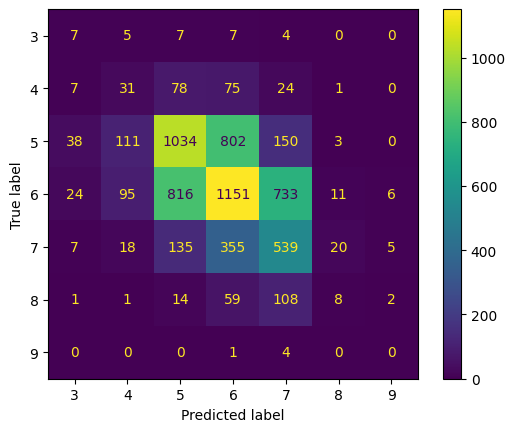

In [181]:
crearMatriz(vino,alg,kFold)

Accuracy global: 0.26092889566831884
Clase: Accuracy
3: 0.16666666666666666
4: 0.12037037037037036
5: 0.5411599625818522
6: 0.4217207334273625
7: 0.5403151065801668
8: 0.03626943005181347
9: 0.0


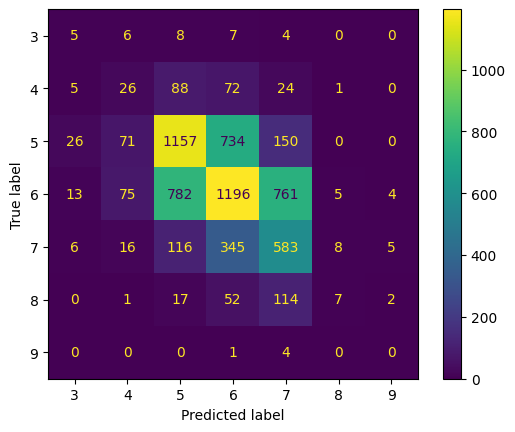

In [187]:
crearMatriz(vino,alg,oneOut)

## Abalone

In [186]:
# crearMatriz(abalone,alg,holdOut) # No se pudo aplicar el holdout porque faltaron datos en algunas clases

Accuracy global: 0.1264399688421471
Clase: Accuracy
1: 0.0
2: 0.0
3: 0.8
4: 0.42105263157894735
5: 0.46956521739130436
6: 0.36293436293436293
7: 0.34271099744245526
8: 0.2482394366197183
9: 0.26850507982583455
10: 0.1829652996845426
11: 0.4271047227926078
12: 0.0
13: 0.0
14: 0.0
15: 0.0
16: 0.0
17: 0.017241379310344827
18: 0.0
19: 0.0
20: 0.0
21: 0.0
22: 0.0
23: 0.0
24: 0.0
25: 0.0
26: 0.0
27: 0.0
29: 0.0


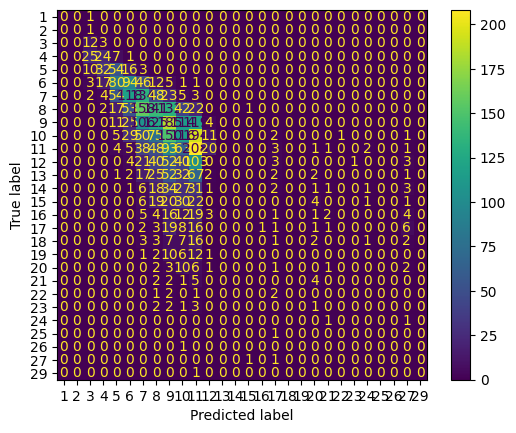

In [184]:
crearMatriz(abalone,alg,kFold)

Accuracy global: 0.13089493411996356
Clase: Accuracy
1: 0.0
2: 0.0
3: 0.8666666666666667
4: 0.43859649122807015
5: 0.4260869565217391
6: 0.3745173745173745
7: 0.33248081841432225
8: 0.24295774647887325
9: 0.28011611030478956
10: 0.19400630914826497
11: 0.45790554414784396
12: 0.0
13: 0.0
14: 0.0
15: 0.0
16: 0.0
17: 0.05172413793103448
18: 0.0
19: 0.0
20: 0.0
21: 0.0
22: 0.0
23: 0.0
24: 0.0
25: 0.0
26: 0.0
27: 0.0
29: 0.0


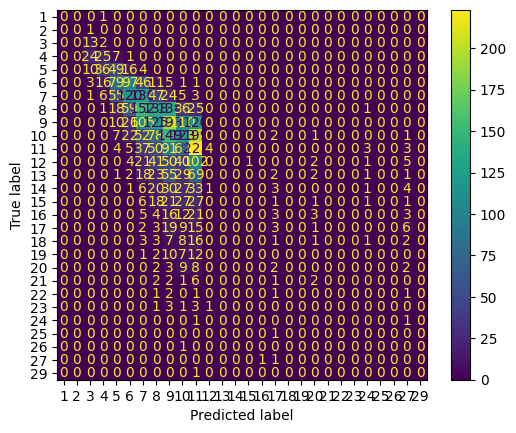

In [185]:
crearMatriz(abalone,alg,oneOut)